# Customer Churn Prediction

## Inspecting Data

In [29]:
import pandas as pd

In [ ]:
data = pd.read_csv("customer-churn-prediction-2020/train.csv")
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
data.info()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
dtype: int64

## Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

churn    0   1
state         
AK      57   4
AL      88  13
AR      60  11
AZ      70   7
CA      29  10
CO      71   9
CT      73  15
DC      64   8
DE      67  13
FL      67   9
GA      57   7
HI      73   4
IA      55   7
ID      94  12
IL      73   6
IN      70  13
KS      72  15
KY      73  12
LA      62   7
MA      75  14
MD      67  19
ME      73  16
MI      72  15
MN      89  19
MO      70  10
MS      67  15
MT      63  17
NC      73   7
ND      61   6
NE      68   5
NH      68  10
NJ      70  26
NM      68  10
NV      66  17
NY      80  16
OH      83  12
OK      62  16
OR      84  15
PA      59   8
RI      81   6
SC      58  14
SD      64  11
TN      67  12
TX      79  19
UT      85  12
VA      95   5
VT      76  10
WA      62  18
WI      87   7
WV     120  19
WY      85  10


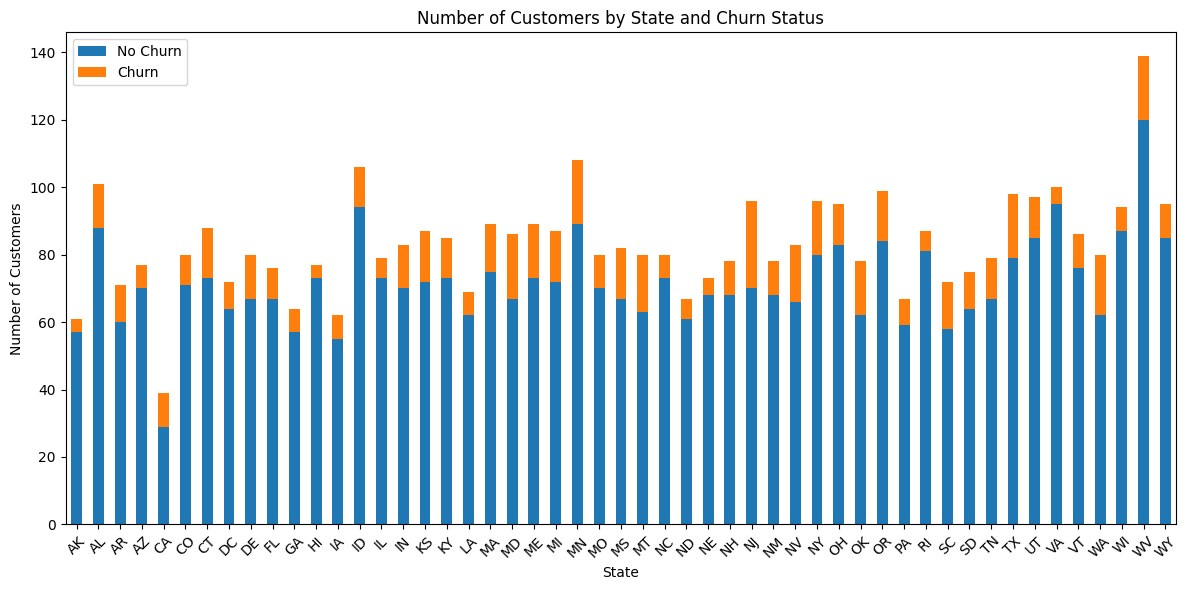

In [ ]:
state_counts = data.groupby('state')['churn'].value_counts().unstack()
print(state_counts)
fig, ax = plt.subplots(figsize=(12, 6))
state_counts.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by State and Churn Status')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### This graph shows how churn varies by state in the USA.

In [ ]:
sns.stripplot(data=data, x="international_plan", y="total_intl_minutes", hue="churn")
plt.xlabel('International Plan')
plt.ylabel('Total International Minutes')
plt.title('Strip Plot of Total International Minutes vs. International Plan')
plt.show()

#### This graph shows us how people on both domestic and international plans use international talk-time as well as how this affects churn.

In [33]:
data['international_plan'] = data['international_plan'].map({'no': 0, 'yes': 1})
data['churn'] = data['churn'].map({'no': 0, 'yes': 1})
# These are only to be used if the data is re-imported

table = data.groupby(['international_plan', 'churn']).size().reset_index(name='count')
table = table.pivot_table(index='international_plan', columns='churn', values='count', fill_value=0)

combination_00 = table.at[0, 0]
combination_01 = table.at[0, 1]
combination_10 = table.at[1, 0]
combination_11 = table.at[1, 1]

counts = data['international_plan'].value_counts()

churn_intl = round(combination_11/counts[1] * 100, 2)
churn_domestic = round(combination_01/counts[0] * 100, 2)


print(f"Number of domestic plan customers who stayed: {combination_00}")
print(f"Number of domestic plan customers who left: {combination_01}")
print(f"Number of international plan customers who stayed: {combination_10}")
print(f"Number of international plan customers who left: {combination_11}")
print(f"Percentage of international plan customers who switched: {churn_intl}%")
print(f"Percentage of domestic plan customers who switched: {churn_domestic}%")

Number of domestic plan customers who stayed: 3423
Number of domestic plan customers who left: 431
Number of international plan customers who stayed: 229
Number of international plan customers who left: 167
Percentage of international plan customers who switched: 42.17%
Percentage of domestic plan customers who switched: 11.18%


#### As shown above, there is a very high churn rate for customers on the international plan, which indicates a problem with it.

churn                               0      1
number_customer_service_calls               
0                               789.0   97.0
1                              1358.0  166.0
2                               845.0  102.0
3                               495.0   63.0
4                               117.0   92.0
5                                32.0   49.0
6                                 9.0   19.0
7                                 6.0    7.0
8                                 1.0    1.0
9                                 NaN    2.0


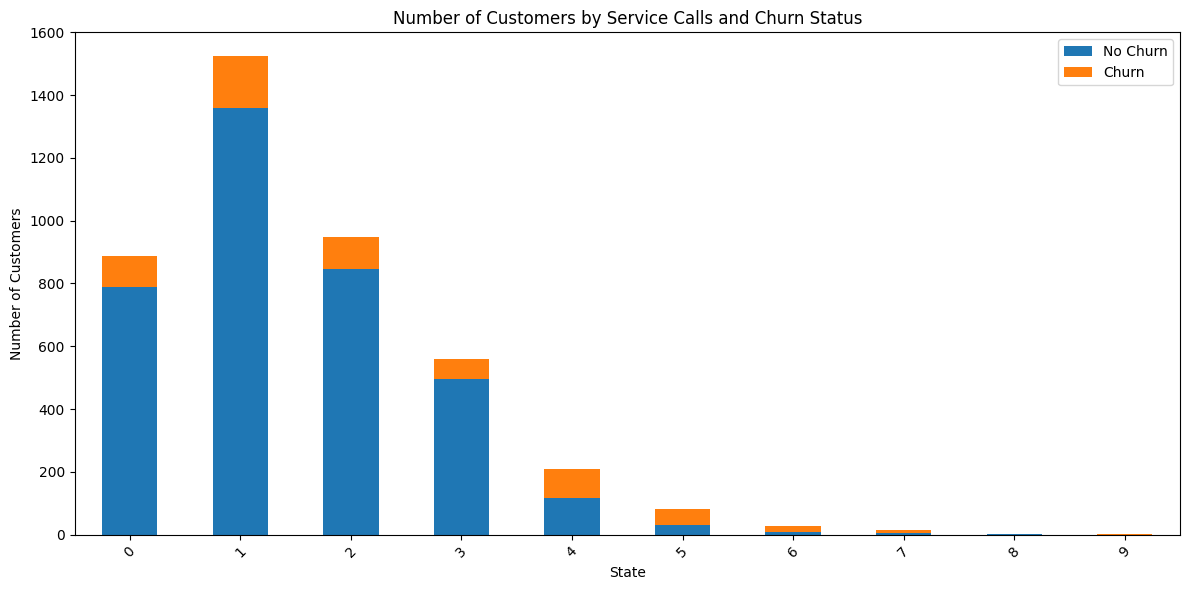

In [35]:
state_counts = data.groupby('number_customer_service_calls')['churn'].value_counts().unstack()
print(state_counts)
fig, ax = plt.subplots(figsize=(12, 6))
state_counts.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Service Calls and Churn Status')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
print(state_counts)

churn                               0      1
number_customer_service_calls               
0                               789.0   97.0
1                              1358.0  166.0
2                               845.0  102.0
3                               495.0   63.0
4                               117.0   92.0
5                                32.0   49.0
6                                 9.0   19.0
7                                 6.0    7.0
8                                 1.0    1.0
9                                 NaN    2.0


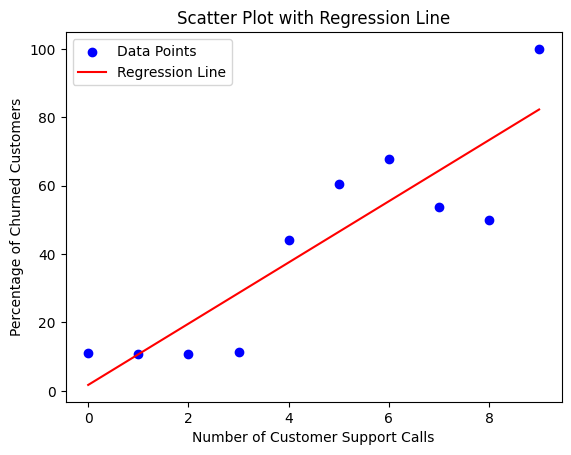

In [37]:
percentage_churn_customer_service = []
state_counts = state_counts.fillna(0)
for i in range(10):
    app = state_counts[1][i]/(state_counts[0][i] + state_counts[1][i]) * 100
    percentage_churn_customer_service.append(app)
calls = [i for i in range(10)]

slope, intercept = np.polyfit(calls, percentage_churn_customer_service, 1)
regression_line = [slope * i + intercept for i in calls]

plt.scatter(calls, percentage_churn_customer_service, color='blue', label='Data Points')

plt.plot(calls, regression_line, color='red', label='Regression Line')

plt.xlabel('Number of Customer Support Calls')
plt.ylabel('Percentage of Churned Customers')
plt.title('Scatter Plot with Regression Line')

plt.legend()

plt.show()

#### The above scatter plot above displays the churn rate of customers based on the number of support calls made which indicates a growing dissatisfaction as they are forced to follow up.

In [38]:
average_account_length = data.groupby('churn')['account_length'].mean()

print("Average account length for retained customers:", average_account_length[0])
print("Average account length for churned customers:", average_account_length[1])

Average account length for retained customers: 99.9249726177437
Average account length for churned customers: 102.1371237458194


#### For the churned customers, I was curious to understand their history with the company. Oddly, the average churned customer has been with the company longer than the average retained customer. This indicates the company doesn't inspire loyalty in their customers.

In [39]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


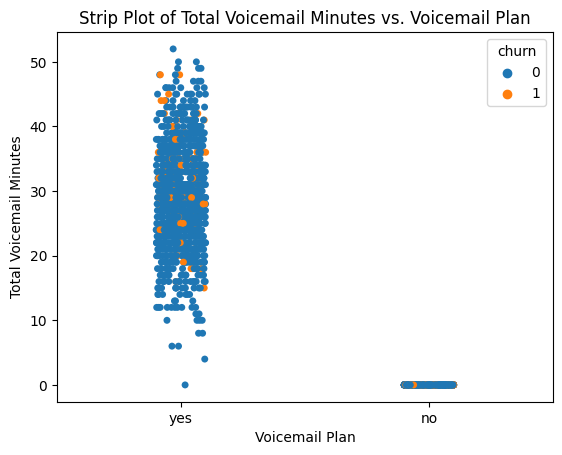

In [40]:
sns.stripplot(data=data, x="voice_mail_plan", y="number_vmail_messages", hue="churn")
plt.xlabel('Voicemail Plan')
plt.ylabel('Total Voicemail Minutes')
plt.title('Strip Plot of Total Voicemail Minutes vs. Voicemail Plan')
plt.show()

In [41]:
data['voice_mail_plan'] = data['voice_mail_plan'].map({'no': 0, 'yes': 1})

table = data.groupby(['voice_mail_plan', 'churn']).size().reset_index(name='count')
table = table.pivot_table(index='voice_mail_plan', columns='churn', values='count', fill_value=0)

combination_00 = table.at[0, 0]
combination_01 = table.at[0, 1]
combination_10 = table.at[1, 0]
combination_11 = table.at[1, 1]

counts = data['voice_mail_plan'].value_counts()

churn_intl = round(combination_11/counts[1] * 100, 2)
churn_domestic = round(combination_01/counts[0] * 100, 2)


print(f"Number of non-voicemail plan customers who stayed: {combination_00}")
print(f"Number of non-voicemail plan customers who left: {combination_01}")
print(f"Number of voicemail plan customers who stayed: {combination_10}")
print(f"Number of voicemail plan customers who left: {combination_11}")
print(f"Percentage of voicemail plan customers who switched: {churn_intl}%")
print(f"Percentage of non-voicemail plan customers who switched: {churn_domestic}%")

Number of non-voicemail plan customers who stayed: 2622
Number of non-voicemail plan customers who left: 516
Number of voicemail plan customers who stayed: 1030
Number of voicemail plan customers who left: 82
Percentage of voicemail plan customers who switched: 7.37%
Percentage of non-voicemail plan customers who switched: 16.44%


#### The above analysis tells us that the customers on the voicemail plan are more likely to be retained.

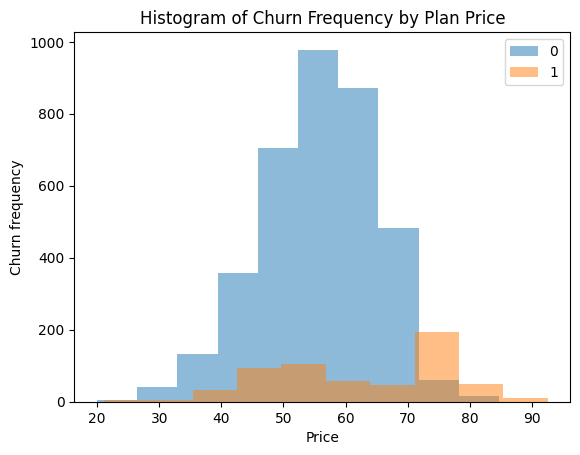

In [42]:
totalCharge = data['total_day_charge'] + data['total_eve_charge'] + data['total_night_charge']

binary_data = data['churn']

continuous_0 = [val for val, bin_val in zip(totalCharge, binary_data) if bin_val == 0]
continuous_1 = [val for val, bin_val in zip(totalCharge, binary_data) if bin_val == 1]

plt.hist(continuous_0, label='0', alpha=0.5)
plt.hist(continuous_1, label='1', alpha=0.5)

plt.xlabel('Price')
plt.ylabel('Churn frequency')
plt.title('Histogram of Churn Frequency by Plan Price')
plt.legend()

plt.show()

#### This tells us how price affects customer churn. At $75, there is a clear increase in churn frequency, indicating that it is too high a price in comparison with competition.

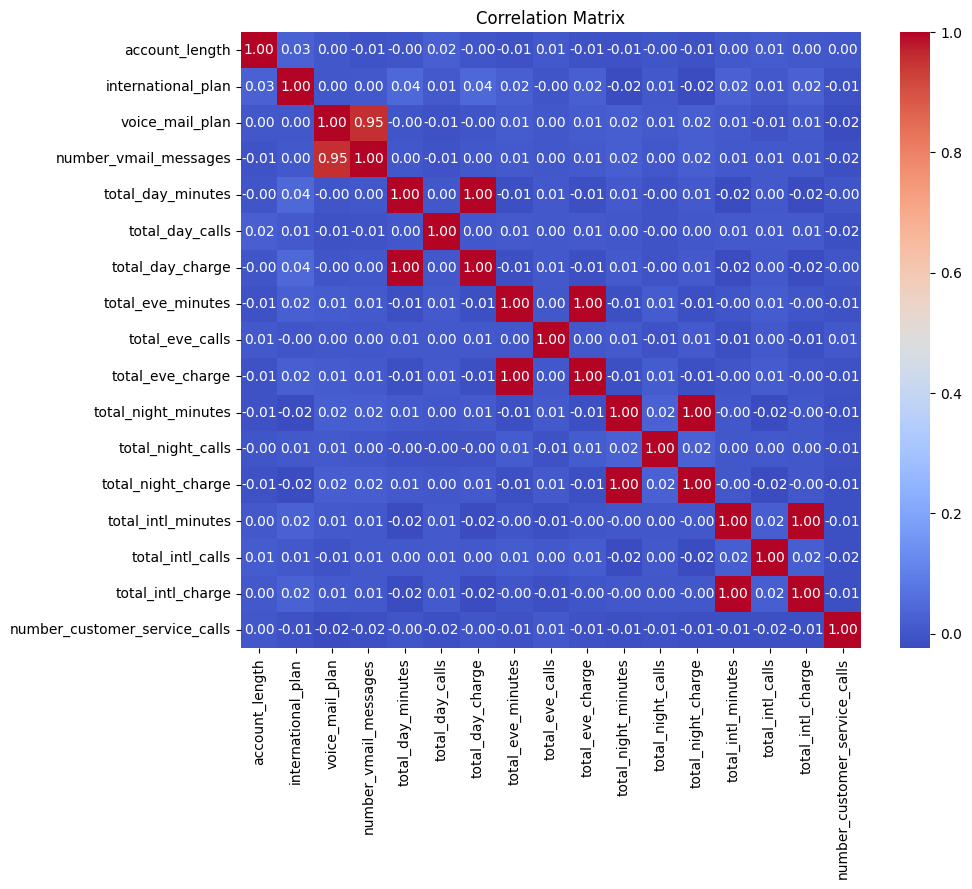

In [43]:
corr = data.drop(['state', 'area_code', 'churn'], axis=1)
correlation_matrix = corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [44]:
y = data['churn']
X = data.drop(['state', 'area_code', 'churn'], axis=1)
X.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


## Model Training and Evaluation

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import multiprocessing

In [46]:
def train_and_evaluate_model(model, X, y, param_grid=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pipeline = Pipeline([
        ('standardscaler', StandardScaler()),
        ('model', model)
    ])

    # Perform parameter tuning, update the model based on the best hyperparameters.
    if param_grid:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            grid_search = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=multiprocessing.cpu_count())
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            model = best_model

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2%}")

    labels = model.classes_
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    report = classification_report(y_test, y_pred, labels=labels)
    print("Classification Report:\n", report)

# Implementing feature scaling and parameter tuning has helped increase the accuracy score of all the models. Also, multiprocessing saved me a tonne of time - so if you don't use it normally, you should!
# In case you want to try this out for yourself - feel free to modify the parameter values.

Accuracy: 86.94%


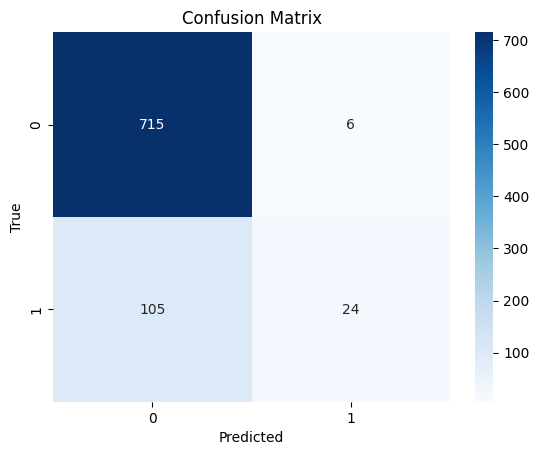

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       721
           1       0.80      0.19      0.30       129

    accuracy                           0.87       850
   macro avg       0.84      0.59      0.61       850
weighted avg       0.86      0.87      0.83       850



In [47]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
"""
This parameter grid is specific to a logistic regression model.
The parameter 'l1' refers to L1 regularization or Lasso regularization), and 'l2' refers to L2 regularization or Ridge regularization.

Lasso Regularization (L1 regularization):

Lasso regularization adds the absolute value of the coefficients as the penalty term to the loss function. It has a sparsity-inducing effect, meaning it tends to push the coefficients of less important features towards zero, effectively performing feature selection. Lasso can be particularly useful when dealing with high-dimensional data where there may be many irrelevant or redundant features. It can help automatically identify and exclude irrelevant features from the model.

Ridge Regularization (L2 regularization):

Ridge regularization adds the square of the coefficients as the penalty term to the loss function. It encourages the coefficients to be small but does not tend to push them all the way to zero. The coefficients are shrunk towards zero but remain non-zero. Ridge regularization is useful for preventing high correlation among features. It can stabilize the model by reducing the impact of correlated features and preventing large coefficient magnitudes.

We also explore different values for the C parameter, which controls the tradeoff between training error and margin.
"""

logistic_regression = LogisticRegression(solver='liblinear')

train_and_evaluate_model(logistic_regression, X, y, param_grid)

Accuracy: 92.82%


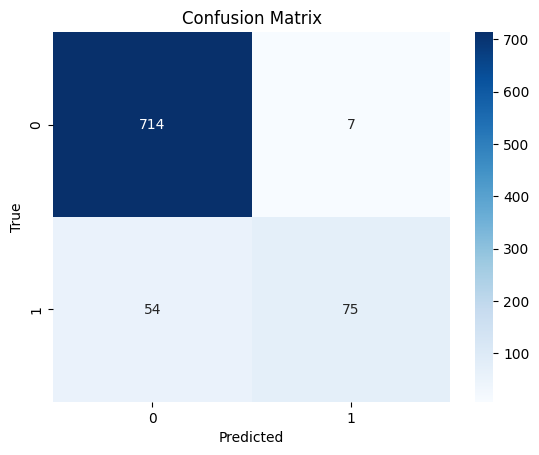

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       721
           1       0.91      0.58      0.71       129

    accuracy                           0.93       850
   macro avg       0.92      0.79      0.83       850
weighted avg       0.93      0.93      0.92       850



In [48]:
# I didn't realize how long this experiment would take. If I had the resources, I would've added 0.001, 10, 100 to param grid for model__C. I decided against it because I'm running this locally on an older machine.
from sklearn.svm import SVC

param_grid = {
    'model__C': [0.01, 0.1, 1],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto']
}
"""
This is a parameter grid specific to the SVM model. Here we explore two different kernels: linear and rbf. kernels specify the type of function used to transform the input data into a higher-dimensional space. LINALG nightmare haha.  The Gamma parameter also has two options: scale and auto. Gamma tells the model how much influence a single training example should have with high values indicating a closer influence and low values indicating a more global influence.
"""

svm_model = SVC()

train_and_evaluate_model(svm_model, X, y, param_grid)

Accuracy: 96.12%


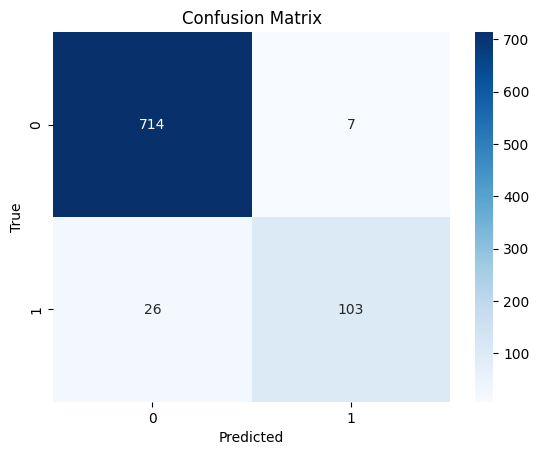

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       721
           1       0.94      0.80      0.86       129

    accuracy                           0.96       850
   macro avg       0.95      0.89      0.92       850
weighted avg       0.96      0.96      0.96       850



In [49]:
from sklearn.ensemble import RandomForestClassifier

# param_grid = {
#     'model__n_estimators': [50, 100, 200],
#     'model__max_depth': [None, 5, 10],
#     'model__min_samples_split': [2, 5, 10],
#     'model__min_samples_leaf': [1, 2, 4]
# }
"""
This is a parameter grid specific to the Random Forest model where we explore different values for n_estimators (the number of trees in the forest), max_depth (the maximum depth of the trees), min_samples_split (the minimum number of samples required to split an internal node), and min_samples_leaf (the minimum number of samples required to be at a leaf node). These are pretty self explanatory if you've studied basic AI.

I didn't have the patience to wait for this parameter grid- so the report below is using vanilla Random Forest - which is impressive. However if you have the resources, run it with the parameter grid.

"""

random_forest = RandomForestClassifier()

train_and_evaluate_model(random_forest, X, y)

Accuracy: 96.24%


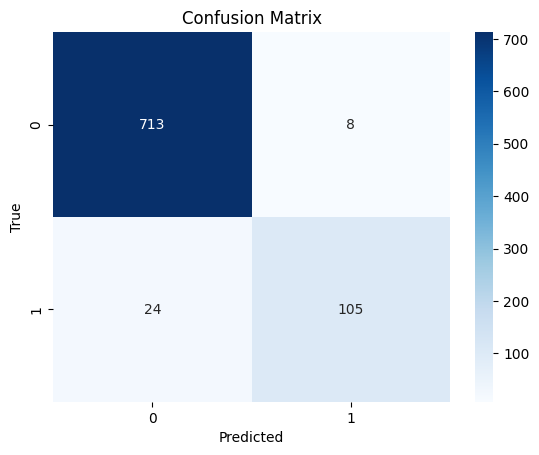

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       721
           1       0.93      0.81      0.87       129

    accuracy                           0.96       850
   macro avg       0.95      0.90      0.92       850
weighted avg       0.96      0.96      0.96       850



In [50]:
from xgboost import XGBClassifier

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6],
    'model__learning_rate': [0.1, 0.3],
}
"""
This parameter grid is specific to xgboost. We already know two of the three hyperparameters. The third, learning rate is just the size of step taken in each iteration. This is important since a higher rate will ensure faster convergence, but could overshoot the optimal solution."""

xgboost = XGBClassifier()

train_and_evaluate_model(xgboost, X, y, param_grid)

#### I really enjoyed working on this and hope my documentation helps anyone in search of similar information.